In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

In [ ]:

df_Stroke = pd.read_csv('/content/drive/MyDrive/Semester 7/healthcare-dataset-stroke-data.csv')
df_Stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
len(df_Stroke)

5110

# PREPROCESSING

In [ ]:
df_Stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df_Stroke.drop('id',axis=1,inplace=True)

Label Encorder

In [ ]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the categorical column
df_Stroke['gender'] = label_encoder.fit_transform(df_Stroke['gender'])
df_Stroke['ever_married'] = label_encoder.fit_transform(df_Stroke['ever_married'])
df_Stroke['work_type'] = label_encoder.fit_transform(df_Stroke['work_type'])
df_Stroke['Residence_type'] = label_encoder.fit_transform(df_Stroke['Residence_type'])
df_Stroke['smoking_status'] = label_encoder.fit_transform(df_Stroke['smoking_status'])



df_Stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
df_Stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


Missing Value (mean-hitung rata")


In [ ]:
# Check for missing values
print(df_Stroke.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# Menghitung mean dari kolom 'bmi', mengabaikan nilai yang hilang
mean_bmi = df_Stroke['bmi'].mean()

# Mengisi missing values pada kolom 'bmi' dengan mean
df_Stroke['bmi'].fillna(mean_bmi, inplace=True)

# Verifikasi apakah missing values sudah diisi
print(df_Stroke.isnull().sum())


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## SPLIT DATA

In [ ]:
x = df_Stroke.drop(['stroke'],axis=1)
y = df_Stroke['stroke']

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

coba smote

In [ ]:
x = df_Stroke.drop(['stroke'],axis=1) ##atribut yang mempengaruhi stroke
y = df_Stroke['stroke'] ##label itu sndri

In [ ]:
##sebelum di smote
print(x.shape)
print(y.shape)

(5110, 10)
(5110,)


In [ ]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Bagi data asli (X dan y) menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

# Latih model menggunakan data training
rf_model.fit(X_train, y_train)

# Prediksi data testing
y_pred = rf_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9393346379647749

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
 [[960   0]
 [ 62   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
print(X_smote.shape)
print(y_smote.shape)

(9722, 10)
(9722,)


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Bagi data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)

# Latih model menggunakan data training
rf_model.fit(X_train, y_train)

# Prediksi data testing
y_pred = rf_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9491002570694087

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       975
           1       0.94      0.96      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945


Confusion Matrix:
 [[910  65]
 [ 34 936]]


In [ ]:
# Import libraries yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Bagi data hasil SMOTE menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Tentukan parameter yang ingin dituning
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],          # Jumlah pohon dalam hutan
    'max_depth': [None, 10, 20, 30, 40, 50],             # Kedalaman maksimal pohon
    'min_samples_split': [2, 5, 10],                     # Minimum sampel untuk split node
    'min_samples_leaf': [1, 2, 4],                       # Minimum sampel di setiap leaf node
    'bootstrap': [True, False],                          # Menggunakan bootstrap sampling
    'criterion': ['gini', 'entropy']                     # Kriteria pemisahan
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_dist,
                                   n_iter=50,         # Jumlah iterasi
                                   cv=5,              # 5-fold cross-validation
                                   verbose=2,         # Tampilkan progres tuning
                                   random_state=42,
                                   n_jobs=-1)         # Gunakan semua core CPU

# Melatih model RandomizedSearchCV pada data training
random_search.fit(X_train, y_train)

# Melihat hyperparameter terbaik yang ditemukan
print("Best Hyperparameters:", random_search.best_params_)

# Gunakan model terbaik untuk prediksi pada data test
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'criterion': 'entropy', 'bootstrap': False}
Accuracy: 0.9568123393316196

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       975
           1       0.95      0.97      0.96       970

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945


Confusion Matrix:
 [[923  52]
 [ 32 938]]


In [ ]:
# Import libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Bagi data hasil SMOTE menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Latih model menggunakan data training
gb_model.fit(X_train, y_train)

# Prediksi data testing
y_pred = gb_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8688946015424165

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       975
           1       0.84      0.91      0.87       970

    accuracy                           0.87      1945
   macro avg       0.87      0.87      0.87      1945
weighted avg       0.87      0.87      0.87      1945


Confusion Matrix:
 [[809 166]
 [ 89 881]]


In [ ]:
# Import libraries yang dibutuhkan
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Bagi data hasil SMOTE menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Tentukan parameter yang ingin dituning
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],          # Jumlah boosting stages
    'learning_rate': [0.01, 0.1, 0.2, 0.3],              # Learning rate
    'max_depth': [3, 4, 5, 6, 7],                        # Kedalaman maksimal dari setiap pohon
    'min_samples_split': [2, 5, 10],                     # Minimum sampel untuk split node
    'min_samples_leaf': [1, 2, 4],                       # Minimum sampel di setiap leaf node
    'subsample': [0.8, 0.9, 1.0]                         # Proporsi sampel yang digunakan untuk fitting
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_model,
                                   param_distributions=param_dist,
                                   n_iter=50,         # Jumlah iterasi
                                   cv=5,              # 5-fold cross-validation
                                   verbose=2,         # Tampilkan progres tuning
                                   random_state=42,
                                   n_jobs=-1)         # Gunakan semua core CPU

# Melatih model RandomizedSearchCV pada data training
random_search.fit(X_train, y_train)

# Melihat hyperparameter terbaik yang ditemukan
print("Best Hyperparameters:", random_search.best_params_)

# Gunakan model terbaik untuk prediksi pada data test
best_gb_model = random_search.best_estimator_
y_pred = best_gb_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.2}
Accuracy: 0.9717223650385605

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       975
           1       0.98      0.96      0.97       970

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945


Confusion Matrix:
 [[954  21]
 [ 34 936]]


In [ ]:
# Import libraries yang dibutuhkan
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Bagi data hasil SMOTE menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model dengan data training
dt_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = dt_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8982005141388175

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90       975
           1       0.88      0.93      0.90       970

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945


Confusion Matrix:
 [[847 128]
 [ 70 900]]


<Axes: xlabel='stroke'>

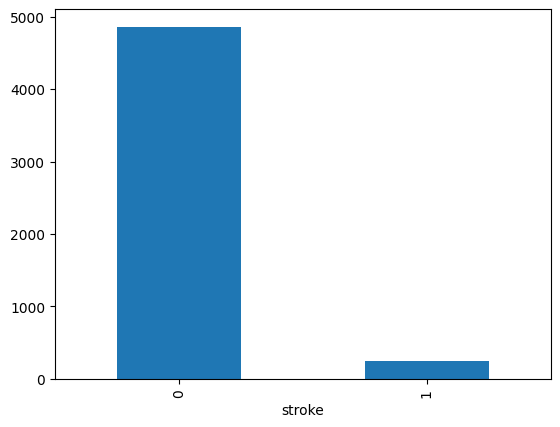

In [ ]:
import matplotlib.pyplot as plt
df_Stroke['stroke'].value_counts().plot(kind = 'bar')

Distribusi kelas setelah SMOTE:
 stroke
1    4861
0    4861
Name: count, dtype: int64


<ipython-input-148-854ee2474ad6>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df_smote, palette=['#1f77b4', '#1f77b4'])


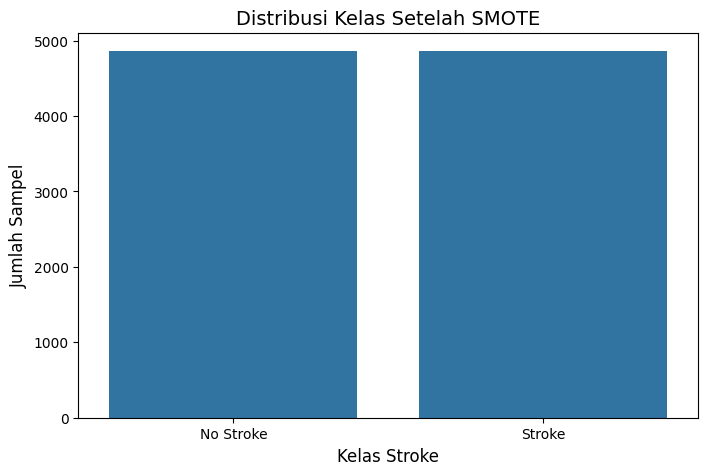

In [ ]:
# Import libraries
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh DataFrame df_Stroke (ubah sesuai dengan dataset Anda)
# Asumsikan df_Stroke adalah dataframe yang mengandung data stroke
# Misalnya: df_Stroke = pd.read_csv("stroke_data.csv")

# Fitur dan target
x = df_Stroke[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
               'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df_Stroke['stroke']

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x, y)

# Ubah menjadi DataFrame agar lebih mudah digunakan
df_smote = pd.DataFrame(X_smote, columns=['gender', 'age', 'hypertension', 'heart_disease',
                                          'ever_married', 'Residence_type', 'avg_glucose_level',
                                          'bmi', 'smoking_status'])
df_smote['stroke'] = y_smote

# Cek distribusi data setelah SMOTE
print("Distribusi kelas setelah SMOTE:\n", df_smote['stroke'].value_counts())


plt.figure(figsize=(8, 5))
sns.countplot(x='stroke', data=df_smote, palette=['#1f77b4', '#1f77b4'])
plt.title('Distribusi Kelas Setelah SMOTE', fontsize=14)
plt.xlabel('Kelas Stroke', fontsize=12)
plt.ylabel('Jumlah Sampel', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'], fontsize=10)  # Label lebih deskriptif
plt.yticks(fontsize=10)
plt.show()


# RANDOM FOREST

Akurasi:  0.9485861182519281

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       973
           1       0.94      0.96      0.95       972

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



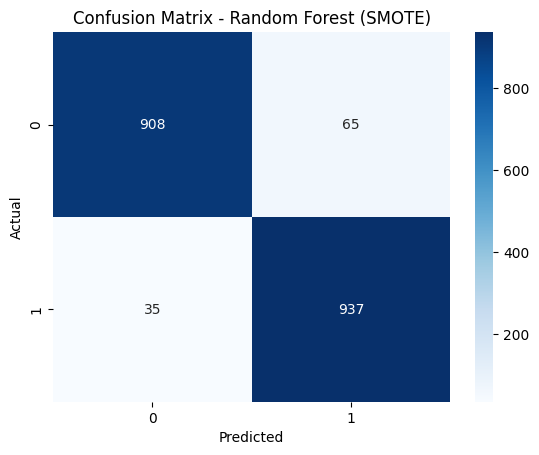

In [ ]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Pisahkan fitur dan target
X = df_smote.drop(columns='stroke')
y = df_smote['stroke']

# Split data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Latih model pada data training
rf_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = rf_model.predict(X_test)

# Evaluasi model
print("Akurasi: ", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Visualisasi Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (SMOTE)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [ ]:
estimator=rfc
param_grid={
            'n_estimators':[100,120],
            'max_depth':[15,None],
            'max_features':['sqrt', 'log2'],

}
rfc_grid=GridSearchCV(  estimator,
                param_grid,
                scoring='accuracy',
                n_jobs=-1,
                cv=5,

            )

NameError: name 'rfc' is not defined

In [ ]:
# Import libraries tambahan
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang akan diuji pada GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],              # Jumlah pohon dalam Random Forest
    'max_depth': [None, 10, 20, 30],              # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],              # Jumlah minimal sampel untuk split node
    'min_samples_leaf': [1, 2, 4],                # Jumlah minimal sampel di setiap daun
    'bootstrap': [True, False]                    # Apakah menggunakan bootstrap sampling
}

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV dengan 5-fold cross validation
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Gunakan semua core CPU untuk mempercepat proses
                           verbose=2)  # Tampilkan progres

# Latih model dengan parameter yang dicoba melalui GridSearch
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Gunakan model dengan parameter terbaik untuk prediksi
best_rf_model = grid_search.best_estimator_

# Prediksi pada data testing
y_pred_best = best_rf_model.predict(X_test)

# Evaluasi model
print("Akurasi setelah tuning: ", accuracy_score(y_test, y_pred_best))
print("\nLaporan Klasifikasi setelah tuning:\n", classification_report(y_test, y_pred_best))

# Visualisasi Confusion Matrix setelah tuning
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (Setelah Tuning)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

# DECISION TREE

Akurasi Decision Tree:  0.9161953727506427

Laporan Klasifikasi Decision Tree:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       973
           1       0.90      0.93      0.92       972

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945



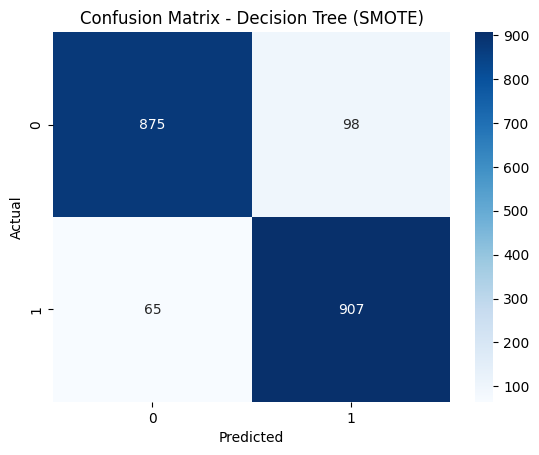

In [ ]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Inisialisasi Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model pada data training
dt_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_dt = dt_model.predict(X_test)

# Evaluasi model
print("Akurasi Decision Tree: ", accuracy_score(y_test, y_pred_dt))
print("\nLaporan Klasifikasi Decision Tree:\n", classification_report(y_test, y_pred_dt))

# Visualisasi Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (SMOTE)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


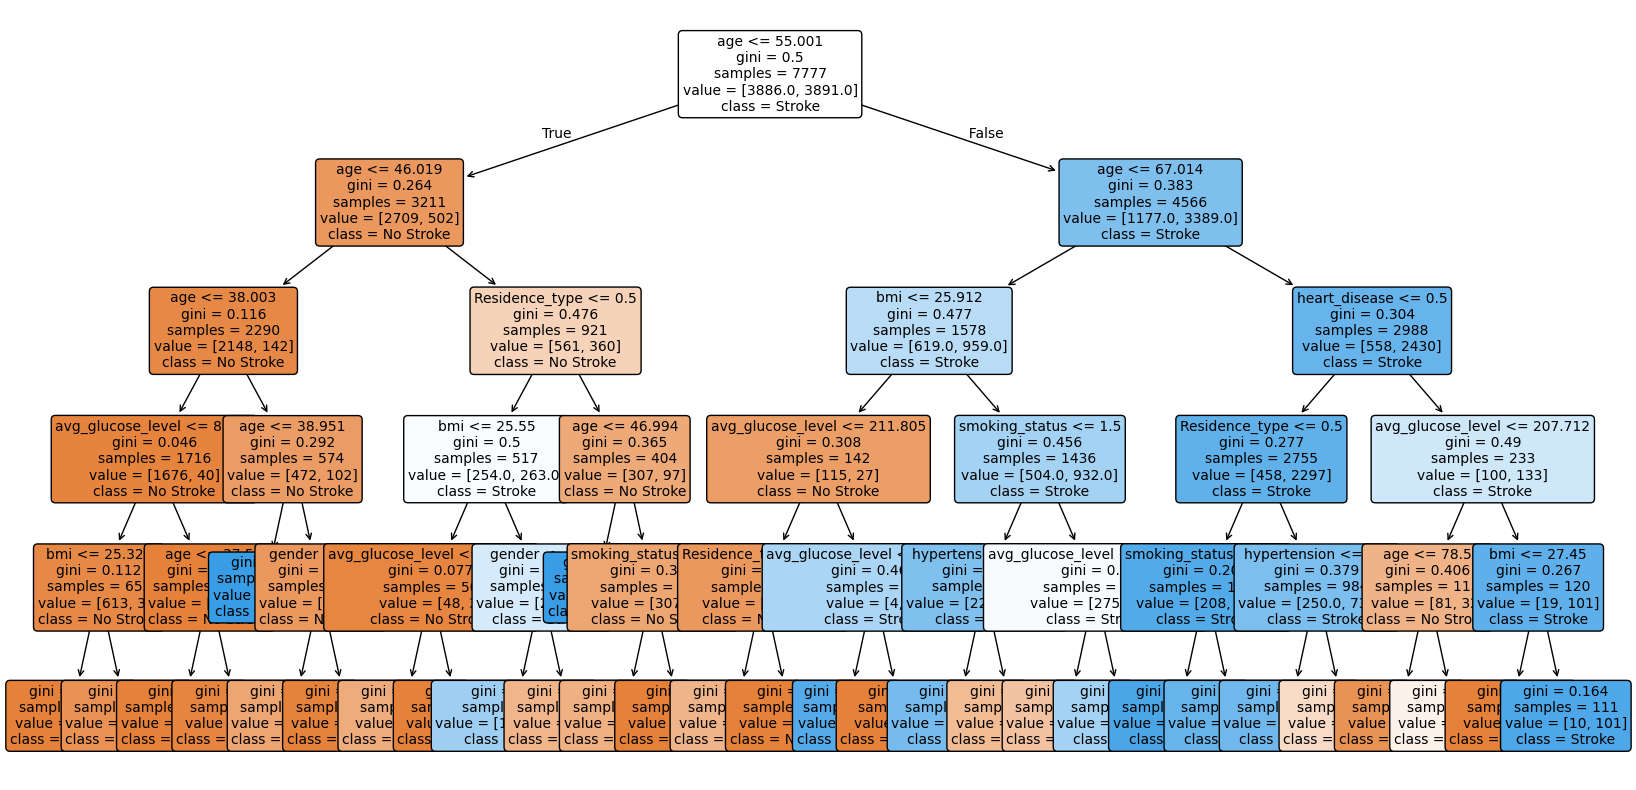

In [ ]:
# Import libraries untuk visualisasi pohon
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualisasi pohon keputusan
plt.figure(figsize=(20,10))  # Tentukan ukuran gambar
plot_tree(clf,
          feature_names=['gender', 'age', 'hypertension', 'heart_disease',
                         'ever_married', 'Residence_type', 'avg_glucose_level',
                         'bmi', 'smoking_status'],
          class_names=['No Stroke', 'Stroke'],
          filled=True, rounded=True, fontsize=10)

plt.show()


# GRADIENT BOOST

Gradient Boosting - Accuracy: 0.8627249357326479
Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       975
           1       0.83      0.91      0.87       970

    accuracy                           0.86      1945
   macro avg       0.87      0.86      0.86      1945
weighted avg       0.87      0.86      0.86      1945

Gradient Boosting - Confusion Matrix:
 [[798 177]
 [ 90 880]]


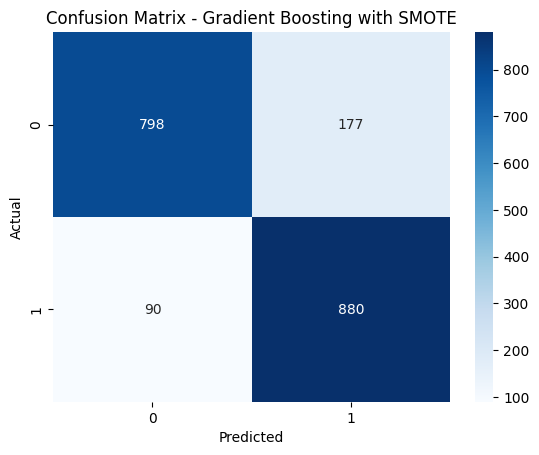

In [ ]:
# Import libraries untuk Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# 1. Terapkan SMOTE untuk menyeimbangkan data (sama seperti sebelumnya)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 2. Split data yang sudah diseimbangkan ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3. Buat model Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 4. Latih model menggunakan data training
gb_clf.fit(X_train, y_train)

# 5. Prediksi menggunakan data testing
y_pred_gb = gb_clf.predict(X_test)

# 6. Evaluasi model
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting - Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

# Visualisasi Confusion Matrix untuk Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting with SMOTE')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# CAT BOOST

In [ ]:
!pip install catboost


CatBoost - Accuracy: 0.8740359897172236
CatBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       975
           1       0.84      0.92      0.88       970

    accuracy                           0.87      1945
   macro avg       0.88      0.87      0.87      1945
weighted avg       0.88      0.87      0.87      1945

CatBoost - Confusion Matrix:
 [[806 169]
 [ 76 894]]


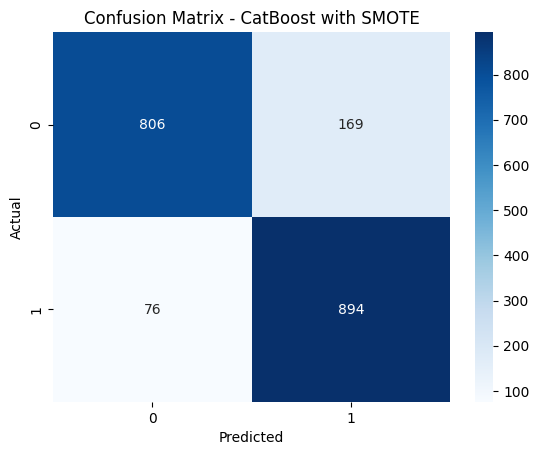

In [ ]:
# Import libraries
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh dataset (silakan sesuaikan dengan dataset Anda)
# df_Stroke = pd.read_csv("your_dataset.csv") # Load dataset di sini

# Misalkan dataset memiliki kolom 'stroke' sebagai target
X = df_Stroke[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type',
               'avg_glucose_level', 'bmi', 'smoking_status']]
y = df_Stroke['stroke']  # Target

# 1. Terapkan SMOTE untuk menyeimbangkan data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 2. Split data yang sudah diseimbangkan ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3. Buat model CatBoostClassifier
catboost_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)

# 4. Latih model menggunakan data training
catboost_clf.fit(X_train, y_train)

# 5. Prediksi menggunakan data testing
y_pred_cat = catboost_clf.predict(X_test)

# 6. Evaluasi model
print("CatBoost - Accuracy:", accuracy_score(y_test, y_pred_cat))
print("CatBoost - Classification Report:\n", classification_report(y_test, y_pred_cat))
print("CatBoost - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))

# Visualisasi Confusion Matrix untuk CatBoost
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(conf_matrix_cat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CatBoost with SMOTE')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Mengatasi Data Tidak Seimbang - Oversampling SMOTE

# SPLIT DATA

In [ ]:
x = df_Stroke.drop(['stroke'],axis=1)
y = df_Stroke['stroke']

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)